In [1]:
import xarray as xr
%pylab inline
pylab.rcParams['figure.figsize'] = (18.0, 10.0) # Large figures

/glade/u/apps/ch/opt/pythonpkgs/2.7/xarray/0.9.5/intel/16.0.3/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


Populating the interactive namespace from numpy and matplotlib


In [2]:
# gx3v7 output; daily averages
casename='C1850ECO.T62_g37.ciso.marbl_dev_levy'
rundir='/glade2/scratch2/mlevy/%s/run' % casename
date='0001-01-02'
#print '%s/%s.pop.h.%s.nc' % (rundir, casename, casename)
filename = '%s/%s.pop.h.%s.nc' % (rundir, casename, date)
ds = xr.open_dataset(filename, decode_times=False, decode_coords=False)

In [3]:
# Variables to keep in dataset
vars_to_keep = ['TLAT', 'TLONG', 'z_t', 'z_w_bot', 'dz', 'TEMP', 'SALT']

# Pick an (i,j)
# (17,18) is Southern Ocean (28.1 E, 50.576 S); has 56 levels
# (19,50) is near SOFS site SW of Tasmania (143.3 E, 45.695 S); has 54 levels
lat_in = 19
lon_in = 50

single_col = ds.isel(time=0, nlat=lat_in, nlon=lon_in).drop([v for v in ds.variables if v not in vars_to_keep])
single_col

# TODO: unit conversion (rename Salinity units 'psu', everything else to mks)

<xarray.Dataset>
Dimensions:  (z_t: 60, z_w_bot: 60)
Coordinates:
  * z_t      (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_w_bot  (z_w_bot) float64 1e+03 2e+03 3e+03 4e+03 5e+03 6e+03 7e+03 ...
Data variables:
    dz       (z_t) float64 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 ...
    TLONG    float64 143.3
    TLAT     float64 -45.69
    TEMP     (z_t) float64 12.51 12.47 12.43 12.37 12.28 12.0 11.65 11.33 ...
    SALT     (z_t) float64 34.87 34.82 34.82 34.82 34.83 34.83 34.82 34.82 ...
Attributes:
    title:             C1850ECO.T62_g37.ciso.marbl_dev_levy
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  day_1
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id: tavg.F90 88547 2018-02-12 21:46:56Z mlevy@ucar.edu $
    calendar:          All years have exactly  365 days.
    sta

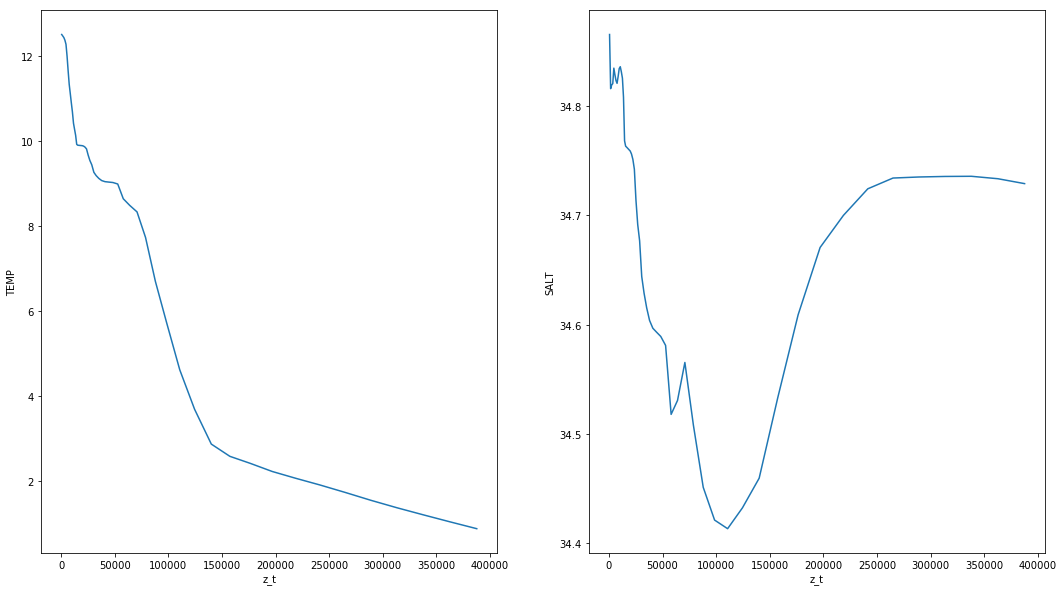

In [4]:
fig, axes = plt.subplots(ncols=2)

single_col.TEMP.plot(ax=axes[0])
single_col.SALT.plot(ax=axes[1])